In [36]:
import os
from six.moves import urllib
# statistic csv file links
DOWNLOAD_CRIME_STATISTICS = "https://drive.google.com/u/0/uc?id=14s-VM_QxBf2lxLAElazVrmHKXoocR04R&export=download"
DOWNLOAD_EDUCATION_STATISTICS = "https://drive.google.com/u/0/uc?id=1-1KTG-t7F5aKPzre9zk00feRKDoF3Wry&export=download"

In [37]:
# define the file path and make sure it exists
STATISTICS_PATH = os.path.join("datasets", "UK Census")
if not os.path.isdir(STATISTICS_PATH):
  os.makedirs(STATISTICS_PATH)

In [38]:
# remove any files in the directory (if the directory existed before)
for filename in os.listdir(STATISTICS_PATH):
  os.remove(os.path.join(STATISTICS_PATH, filename))

In [40]:
# download the files from drive
crime_file_name = "CrimeByTownUk.csv"
education_file_name = "EducationQualityByAreaOfstedReport.csv"

crime_path = os.path.join(STATISTICS_PATH, crime_file_name)
education_path = os.path.join(STATISTICS_PATH, education_file_name)
urllib.request.urlretrieve(DOWNLOAD_CRIME_STATISTICS, crime_path)
print("Successfully downloaded: ", crime_file_name)
urllib.request.urlretrieve(DOWNLOAD_EDUCATION_STATISTICS, education_path)
print("Successfully downloaded: ", education_file_name)

URLError: <urlopen error [Errno 8] nodename nor servname provided, or not known>

In [241]:
import pandas as pd
# reading in the csv
crime_statistics = pd.read_csv("datasets/UK Census/CrimeByTownUk.csv")
education_statistics = pd.read_csv("datasets/UK Census/EducationQualityByAreaOfstedReport.csv")

In [242]:
# rename the crime Local Authority name column to Local authority area so i can key the columns together 
crime_statistics.rename(columns={"Local Authority\n name": "Local authority area"}, inplace=True)

In [243]:
# merge the two datasets together based on the area name
education_and_crime_statistics = pd.merge(crime_statistics, education_statistics, on="Local authority area")

In [244]:
# remove all rows with values that are null
education_and_crime_statistics = education_and_crime_statistics[education_and_crime_statistics['Local authority area'].notna()]
education_and_crime_statistics = education_and_crime_statistics[education_and_crime_statistics['Overall effectiveness'].notna()]
education_and_crime_statistics = education_and_crime_statistics.drop(education_and_crime_statistics[education_and_crime_statistics['Total recorded crime\n (excluding fraud)'] == '[x]'].index)

In [245]:
# remove columns that aren't needed
education_and_crime_statistics = education_and_crime_statistics.drop(columns=['Police Force Area\n code', 'Police Force Area\n name', 'Community Safety\n Partnership code', 'Community Safety\n Partnership name', 'Local Authority\n code', 'URN', 'Five-Year Ofsted Inspection Data publish date', 'Publication type', 'Remit', 'As at date', 'Published date', 'Government office region', 'Constituency', 'Postcode', 'Provider type', 'Provision type', 'Sector', 'Deprivation index', 'Outcomes in education and related learning activities', 'Health services', 'Local authority area', 'Name'], axis=1)

In [246]:
# change the column data type because for some reason it doesn't recognise that I've done that already
education_and_crime_statistics['Total recorded crime\n (excluding fraud)'] = education_and_crime_statistics['Total recorded crime\n (excluding fraud)'].astype("float64")
education_and_crime_statistics['Violence against\n the person'] = education_and_crime_statistics['Violence against\n the person'].astype("float64")
education_and_crime_statistics['Criminal damage and arson'] = education_and_crime_statistics['Criminal damage and arson'].astype("float64")
education_and_crime_statistics['Public order offences'] = education_and_crime_statistics['Public order offences'].astype("float64")

In [247]:
# create additional column data based on the columns we have. It may be worth standardizing the total crime data because there are very dense pockets of data that only become apparent when you look at some of the columns we have below (or maybe just use these columns)
education_and_crime_statistics["Violence per total crimes committed"] = education_and_crime_statistics["Violence against\n the person"] / education_and_crime_statistics["Total recorded crime\n (excluding fraud)"]
education_and_crime_statistics["Arson per total crimes committed"] = education_and_crime_statistics["Criminal damage and arson"] / education_and_crime_statistics["Total recorded crime\n (excluding fraud)"]
education_and_crime_statistics["Public order offences per total crimes committed"] = education_and_crime_statistics["Public order offences"] / education_and_crime_statistics["Total recorded crime\n (excluding fraud)"] 

In [248]:
education_and_crime_statistics

,Total recorded crime\n (excluding fraud),Violence against\n the person,Homicide,Death or serious\n injury caused by\n illegal driving,Violence with injury,Violence without injury,Stalking and harassment,Sexual offences,Robbery,Theft offences,...,Drug offences,Possession of weapons offences,Public order offences,Miscellaneous crimes against society,Overall effectiveness,How well children and young people are helped and protected,The effectiveness of leaders and managers,Violence per total crimes committed,Arson per total crimes committed,Public order offences per total crimes committed
0,12826.0,4752.0,1.00,0.00,1256.00,1936.00,1559.00,471.00,124.00,3934.00,...,227.00,45.00,1754.0,208.00,3.0,3.0,3.0,0.370497,0.102214,0.136753
1,12826.0,4752.0,1.00,0.00,1256.00,1936.00,1559.00,471.00,124.00,3934.00,...,227.00,45.00,1754.0,208.00,3.0,3.0,3.0,0.370497,0.102214,0.136753
2,12826.0,4752.0,1.00,0.00,1256.00,1936.00,1559.00,471.00,124.00,3934.00,...,227.00,45.00,1754.0,208.00,1.0,2.0,1.0,0.370497,0.102214,0.136753
3,12826.0,4752.0,1.00,0.00,1256.00,1936.00,1559.00,471.00,124.00,3934.00,...,227.00,45.00,1754.0,208.00,4.0,4.0,4.0,0.370497,0.102214,0.136753
4,12826.0,4752.0,1.00,0.00,1256.00,1936.00,1559.00,471.00,124.00,3934.00,...,227.00,45.00,1754.0,208.00,2.0,3.0,2.0,0.370497,0.102214,0.136753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8971,26380.0,11099.0,3.00,3.00,3969.00,4472.00,2652.00,1148.00,119.00,6747.00,...,628.00,217.00,2426.0,463.00,2.0,3.0,2.0,0.420735,0.133927,0.091964
8972,26380.0,11099.0,3.00,3.00,3969.00,4472.00,2652.00,1148.00,119.00,6747.00,...,628.00,217.00,2426.0,463.00,2.0,2.0,3.0,0.420735,0.133927,0.091964
8973,26380.0,11099.0,3.00,3.00,3969.00,4472.00,2652.00,1148.00,119.00,6747.00,...,628.00,217.00,2426.0,463.00,2.0,2.0,2.0,0.420735,0.133927,0.091964
8974,26380.0,11099.0,3.00,3.00,3969.00,4472.00,2652.00,1148.00,119.00,6747.00,...,628.00,217.00,2426.0,463.00,2.0,2.0,2.0,0.420735,0.133927,0.091964


In [249]:
# see if there is a correlation between crime stats and education stats
corr_matrix = education_and_crime_statistics.corr()
corr_matrix["Overall effectiveness"].sort_values(ascending=False)

Overall effectiveness                                          1.000000
How well children and young people are helped and protected    0.829287
The effectiveness of leaders and managers                      0.797380
Vehicle offences                                               0.087105
Possession of weapons offences                                 0.086721
Violence without injury                                        0.084705
Robbery                                                        0.083405
Homicide                                                       0.082970
Violence against\n the person                                  0.080567
Stalking and harassment                                        0.077641
Violence with injury                                           0.075592
Sexual offences                                                0.074338
Total recorded crime\n (excluding fraud)                       0.073886
Residential burglary                                           0

<Axes: xlabel='Overall effectiveness', ylabel='Violence per total crimes committed'>

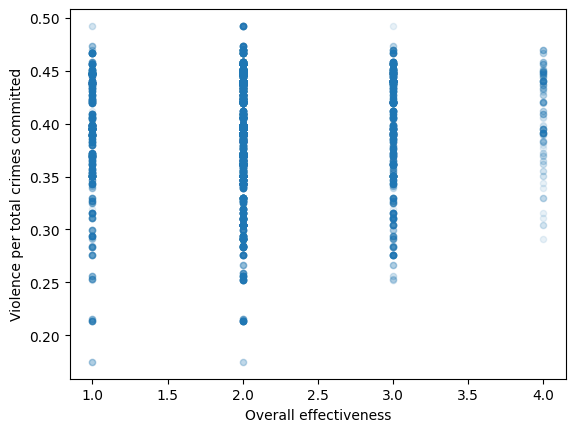

In [250]:
education_and_crime_statistics.plot(kind="scatter", x="Overall effectiveness", y="Violence per total crimes committed",
                                    alpha=0.1)

In [251]:
from sklearn.model_selection import train_test_split

# i'm really glad that they explained this everything else but you know all those functions we have up there splitting the test set and making it random? Well it turns out you don't need to write any of that! you just need to write train_test_split. THANK YOU BOOK FOR TELLING ME NOW.
train_set, test_set = train_test_split(education_and_crime_statistics, test_size=0.2, random_state=42)

<Axes: >

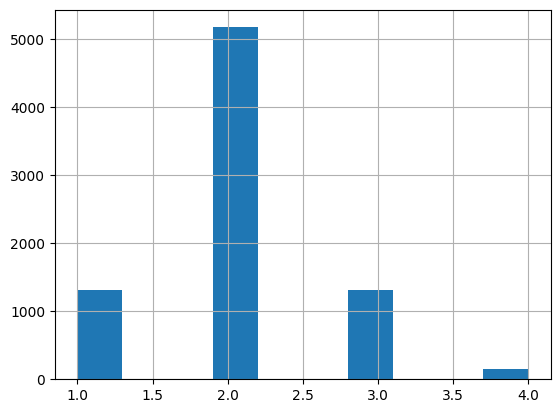

In [252]:
# overall effectiveness will be how i categorise the schools
education_and_crime_statistics["Overall effectiveness"].hist()

In [253]:
education_and_crime_statistics = education_and_crime_statistics.reset_index()

In [254]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(education_and_crime_statistics, education_and_crime_statistics["Overall effectiveness"]):
 strat_train_set = education_and_crime_statistics.loc[train_index]
 strat_test_set = education_and_crime_statistics.loc[test_index]

strat_test_set["Overall effectiveness"].value_counts() / len(strat_test_set)

Overall effectiveness
2.0    0.649310
1.0    0.165621
3.0    0.165621
4.0    0.019448
Name: count, dtype: float64

array([[<Axes: xlabel='Total recorded crime\n (excluding fraud)', ylabel='Total recorded crime\n (excluding fraud)'>,
        <Axes: xlabel='Violence against\n the person', ylabel='Total recorded crime\n (excluding fraud)'>,
        <Axes: xlabel='Overall effectiveness', ylabel='Total recorded crime\n (excluding fraud)'>,
        <Axes: xlabel='Violence per total crimes committed', ylabel='Total recorded crime\n (excluding fraud)'>],
       [<Axes: xlabel='Total recorded crime\n (excluding fraud)', ylabel='Violence against\n the person'>,
        <Axes: xlabel='Violence against\n the person', ylabel='Violence against\n the person'>,
        <Axes: xlabel='Overall effectiveness', ylabel='Violence against\n the person'>,
        <Axes: xlabel='Violence per total crimes committed', ylabel='Violence against\n the person'>],
       [<Axes: xlabel='Total recorded crime\n (excluding fraud)', ylabel='Overall effectiveness'>,
        <Axes: xlabel='Violence against\n the person', ylabel='Overal

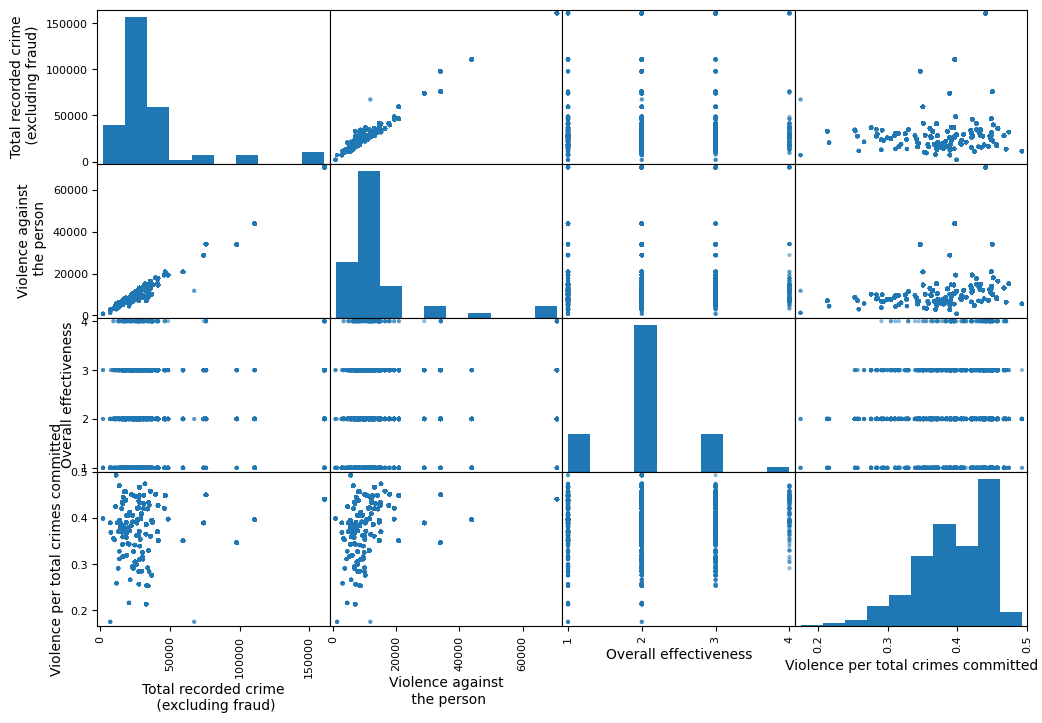

In [255]:
from pandas.plotting import scatter_matrix
# a scatter matrix can also be used to find correlation. Below are some graphs that show the median_house_value and median_income have a positive correlation (same as above)
attributes = ["Total recorded crime\n (excluding fraud)", "Violence against\n the person", "Overall effectiveness", "Violence per total crimes committed"]
scatter_matrix(education_and_crime_statistics[attributes], figsize=(12, 8))

In [256]:
from sklearn.impute import SimpleImputer
# imputer is used to fill in any missing values
imputer = SimpleImputer(strategy="median")
edu_and_crime_imputer = education_and_crime_statistics.copy()
imputer.fit(edu_and_crime_imputer)
imputer.statistics_

array([4.5935000e+03, 2.7657000e+04, 1.1099000e+04, 4.0000000e+00,
       4.0000000e+00, 2.8060000e+03, 4.2330000e+03, 3.7330000e+03,
       9.2000000e+02, 3.4500000e+02, 7.6260000e+03, 1.5420000e+03,
       1.1360000e+03, 4.1200000e+02, 1.9950000e+03, 2.3500000e+02,
       2.4100000e+02, 1.4140000e+03, 2.1390000e+03, 2.7250000e+03,
       6.4700000e+02, 2.6100000e+02, 3.1700000e+03, 5.7900000e+02,
       2.0000000e+00, 2.0000000e+00, 2.0000000e+00, 3.9856522e-01,
       9.5417546e-02, 1.1242731e-01])

In [257]:
X = imputer.transform(edu_and_crime_imputer)
edu_and_crime_tr = pd.DataFrame(X, columns=edu_and_crime_imputer.columns)
edu_and_crime_tr

,index,Total recorded crime\n (excluding fraud),Violence against\n the person,Homicide,Death or serious\n injury caused by\n illegal driving,Violence with injury,Violence without injury,Stalking and harassment,Sexual offences,Robbery,...,Drug offences,Possession of weapons offences,Public order offences,Miscellaneous crimes against society,Overall effectiveness,How well children and young people are helped and protected,The effectiveness of leaders and managers,Violence per total crimes committed,Arson per total crimes committed,Public order offences per total crimes committed
0,0.0,12826.0,4752.0,1.0,0.0,1256.0,1936.0,1559.0,471.0,124.0,...,227.0,45.0,1754.0,208.0,3.0,3.0,3.0,0.370497,0.102214,0.136753
1,1.0,12826.0,4752.0,1.0,0.0,1256.0,1936.0,1559.0,471.0,124.0,...,227.0,45.0,1754.0,208.0,3.0,3.0,3.0,0.370497,0.102214,0.136753
2,2.0,12826.0,4752.0,1.0,0.0,1256.0,1936.0,1559.0,471.0,124.0,...,227.0,45.0,1754.0,208.0,1.0,2.0,1.0,0.370497,0.102214,0.136753
3,3.0,12826.0,4752.0,1.0,0.0,1256.0,1936.0,1559.0,471.0,124.0,...,227.0,45.0,1754.0,208.0,4.0,4.0,4.0,0.370497,0.102214,0.136753
4,4.0,12826.0,4752.0,1.0,0.0,1256.0,1936.0,1559.0,471.0,124.0,...,227.0,45.0,1754.0,208.0,2.0,3.0,2.0,0.370497,0.102214,0.136753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7965,8971.0,26380.0,11099.0,3.0,3.0,3969.0,4472.0,2652.0,1148.0,119.0,...,628.0,217.0,2426.0,463.0,2.0,3.0,2.0,0.420735,0.133927,0.091964
7966,8972.0,26380.0,11099.0,3.0,3.0,3969.0,4472.0,2652.0,1148.0,119.0,...,628.0,217.0,2426.0,463.0,2.0,2.0,3.0,0.420735,0.133927,0.091964
7967,8973.0,26380.0,11099.0,3.0,3.0,3969.0,4472.0,2652.0,1148.0,119.0,...,628.0,217.0,2426.0,463.0,2.0,2.0,2.0,0.420735,0.133927,0.091964
7968,8974.0,26380.0,11099.0,3.0,3.0,3969.0,4472.0,2652.0,1148.0,119.0,...,628.0,217.0,2426.0,463.0,2.0,2.0,2.0,0.420735,0.133927,0.091964


In [258]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
# this is where you would add hyperparameters
total_crime_ix, violence_ix, arson_ix, public_offences_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
 # no *args or **kargs
 def __init__(self, add_public_offences_per_crime = True): 
  self.add_public_offences_per_crime = add_public_offences_per_crime
 def fit(self, X, y=None):
   # nothing else to do
  return self
 def transform(self, X, y=None):
  violence_per_crime = np.float_(X[:, violence_ix]) / (np.float_(X[:, total_crime_ix]) + 1)
  arson_per_crime = np.float_(X[:, arson_ix]) / (np.float_(X[:, total_crime_ix]) + 1)
  if self.add_public_offences_per_crime:
   public_offences_per_crime = np.float_(X[:, public_offences_ix]) / (np.float_(X[:, total_crime_ix]) + 1)
   return np.c_[X, violence_per_crime, arson_per_crime, public_offences_per_crime]
  else:
   return np.c_[X, violence_per_crime, arson_per_crime]
attr_adder = CombinedAttributesAdder(add_public_offences_per_crime=False)
edu_and_crime_extra_attribs = attr_adder.transform(education_and_crime_statistics.values)

In [259]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('attribs_adder', CombinedAttributesAdder()),
 ('std_scaler', StandardScaler()),
 ])
edu_and_crime_tr = num_pipeline.fit_transform(edu_and_crime_imputer)

In [260]:
from sklearn.compose import ColumnTransformer
num_attribs = list(edu_and_crime_imputer)
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs)
 ])
education_and_crime_statistics = strat_train_set.copy()
prepped_education_and_crime = full_pipeline.fit_transform(education_and_crime_statistics)

In [261]:
education_and_crime_labels = strat_train_set["Overall effectiveness"].copy()

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(prepped_education_and_crime, education_and_crime_labels)

LinearRegression()

In [262]:
some_data = education_and_crime_statistics.iloc[:5]
some_labels = education_and_crime_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [1. 3. 3. 3. 4.]


In [263]:
print("Labels:", list(some_labels))

Labels: [1.0, 3.0, 3.0, 3.0, 4.0]


In [264]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(prepped_education_and_crime)
lin_mse = mean_squared_error(education_and_crime_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

6.225648541728629e-16

In [265]:
# the linear regression model is not powerful enough to make meaningful predictions
# so now it will use the decision tree regressor
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(prepped_education_and_crime, education_and_crime_labels)

DecisionTreeRegressor()

In [266]:
housing_predictions = tree_reg.predict(prepped_education_and_crime)
tree_mse = mean_squared_error(education_and_crime_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [267]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, prepped_education_and_crime, education_and_crime_labels,
 scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [268]:
def display_scores(scores):
 print("Scores:", scores)
 print("Mean:", scores.mean())
 print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Mean: 0.0
Standard deviation: 0.0


In [270]:
# the decision tree model seems to perform worse than linear regression but the below just verifies if thats true
lin_scores = cross_val_score(lin_reg, prepped_education_and_crime, education_and_crime_labels,
scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [1.08679692e-15 2.87632145e-15 1.04994312e-15 1.20821957e-15
 1.11802633e-15 1.60060715e-15 1.14390759e-15 1.33618338e-15
 1.01852459e-15 1.94670473e-15]
Mean: 1.4385234845011655e-15
Standard deviation: 5.528035799676621e-16


In [272]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(prepped_education_and_crime, education_and_crime_labels)

RandomForestRegressor()

In [274]:
housing_predictions = forest_reg.predict(prepped_education_and_crime)
forest_mse = mean_squared_error(education_and_crime_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.0

In [276]:
forest_scores = cross_val_score(forest_reg, prepped_education_and_crime, education_and_crime_labels,
 scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.         0.00167968 0.         0.         0.         0.
 0.         0.         0.         0.        ]
Mean: 0.00016796775328675517
Standard deviation: 0.0005039032598602656
